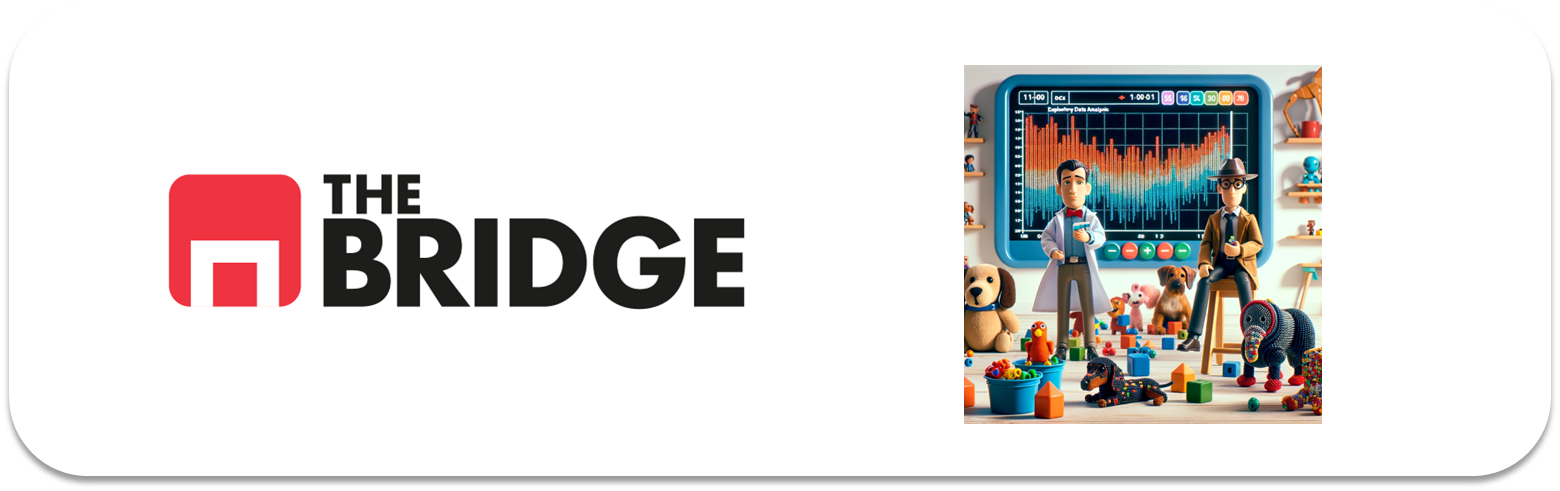

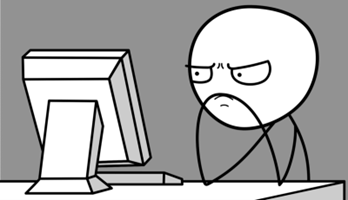

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admission = pd.read_csv("./data/admission_data.csv")

In [3]:
df_admission = df_admission.drop(columns=["Unnamed: 0"])
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  int64 
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: int64(1), object(3)
memory usage: 399.0+ KB


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

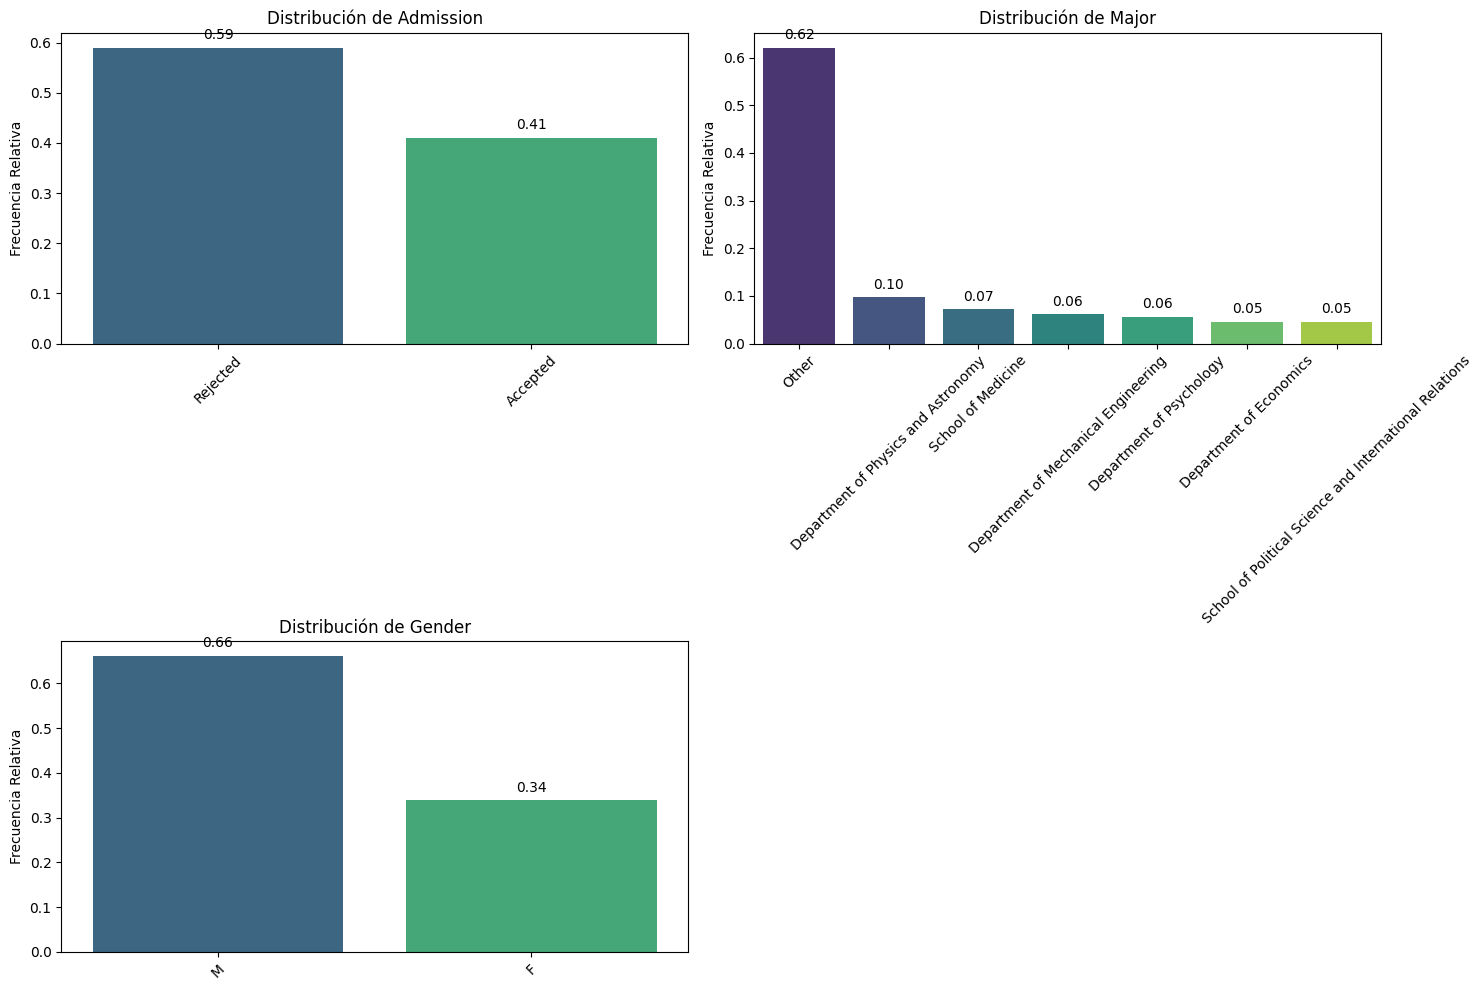

In [4]:
pinta_distribucion_categoricas(df_admission,["Admission","Major","Gender"], relativa= True, mostrar_valores= True)

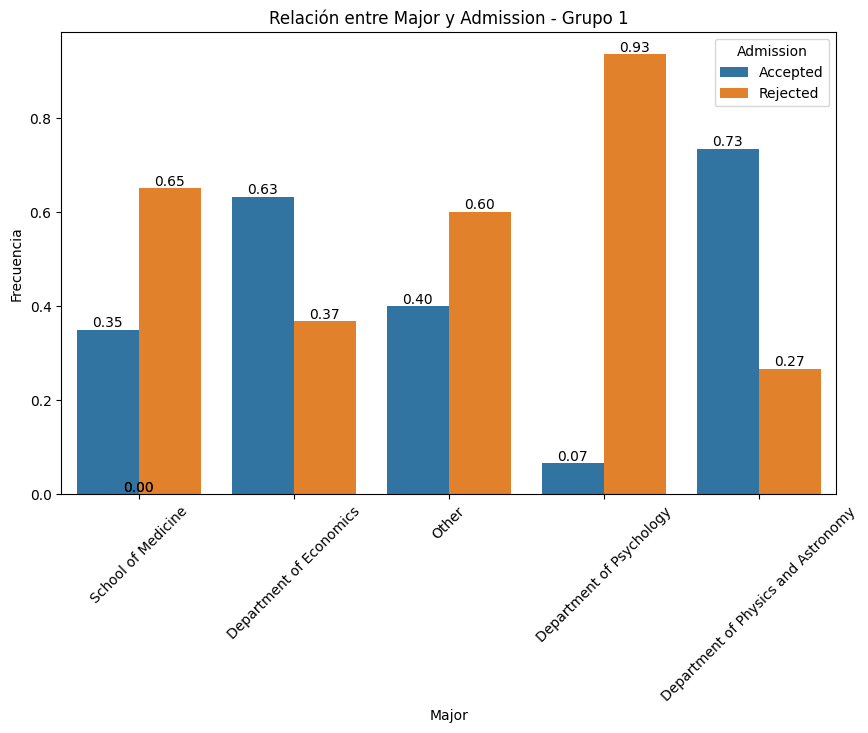

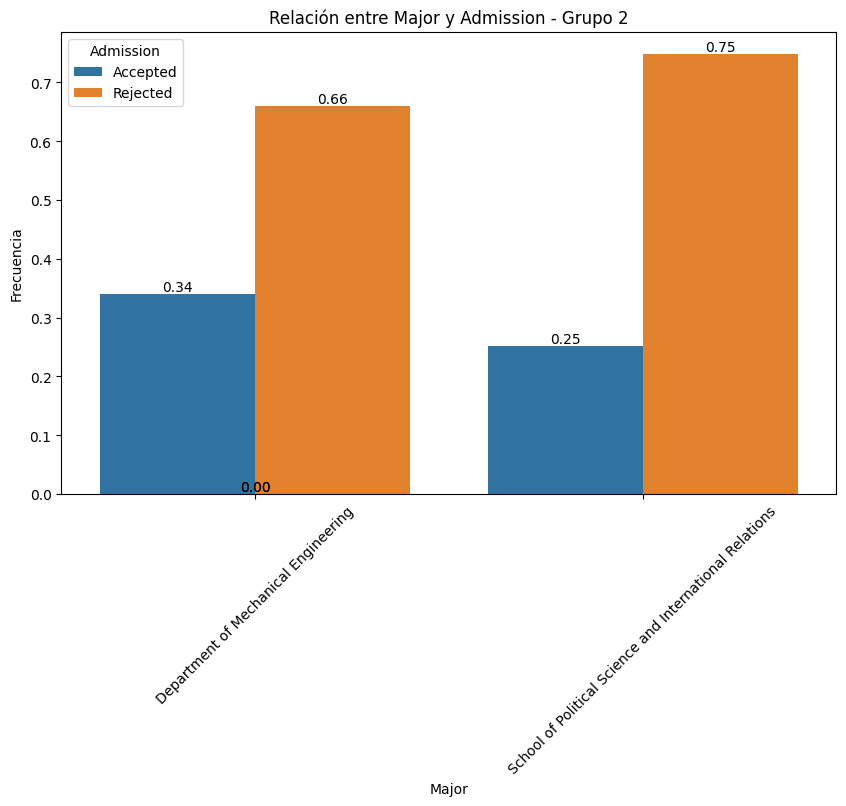

In [5]:
plot_categorical_relationship_fin(df_admission,"Major","Admission", relative_freq= True, show_values= True)

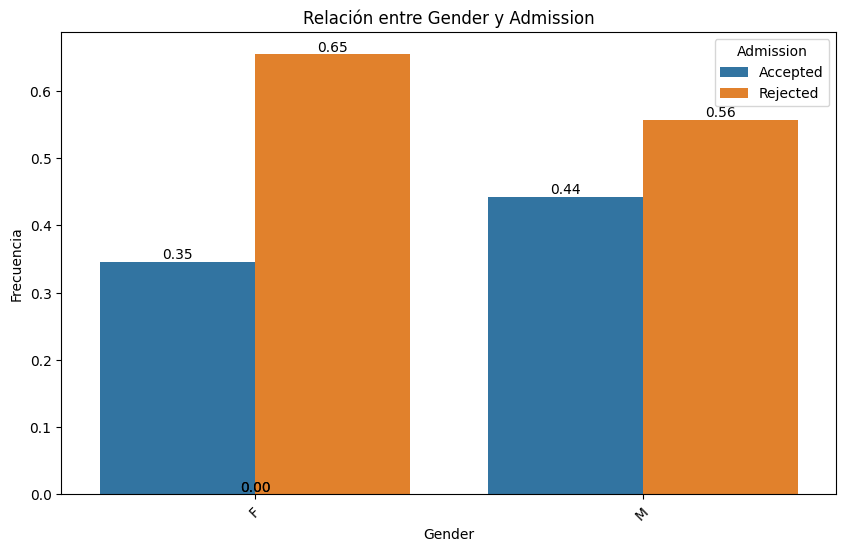

In [6]:
plot_categorical_relationship_fin(df_admission,"Gender","Admission", relative_freq= True, show_values= True)

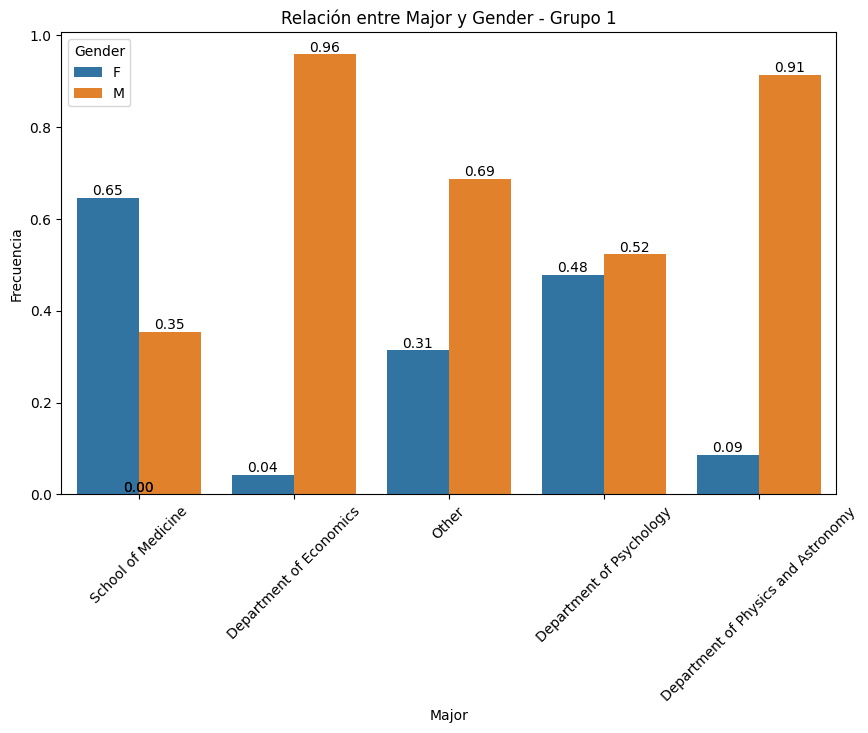

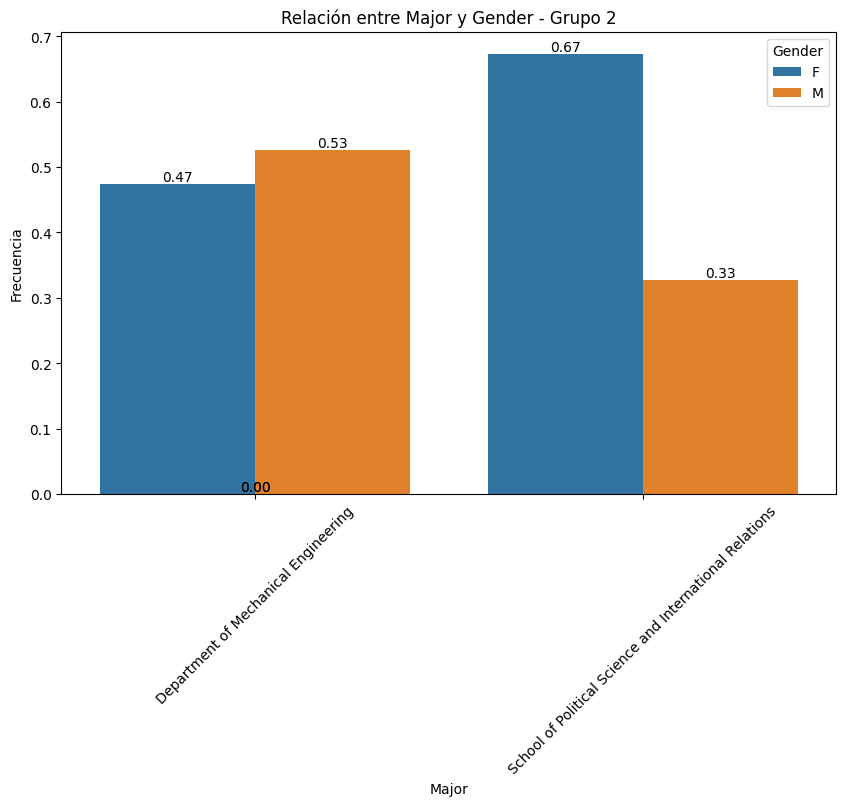

In [7]:
plot_categorical_relationship_fin(df_admission,"Major","Gender", relative_freq= True, show_values= True)

In [8]:
columnas = ["Admission","Major","Gender"] 
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]]

Respuesta Rejected:


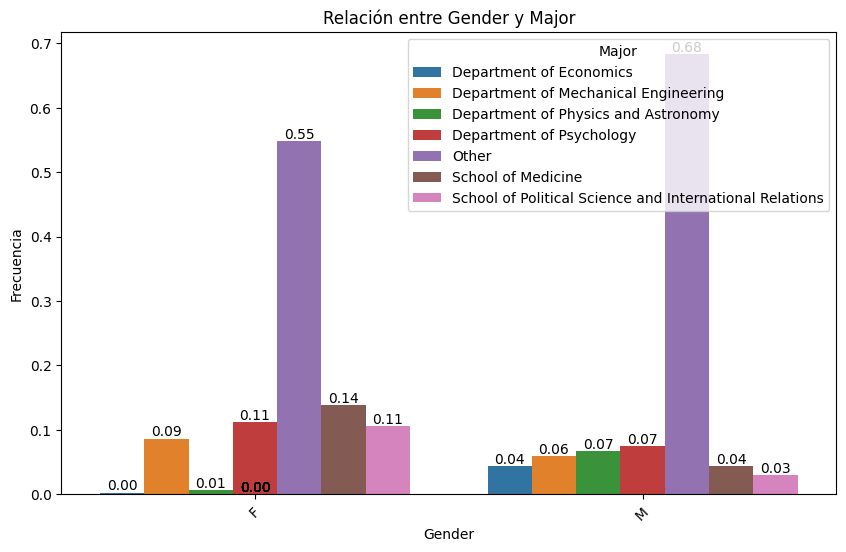

Respuesta Accepted:


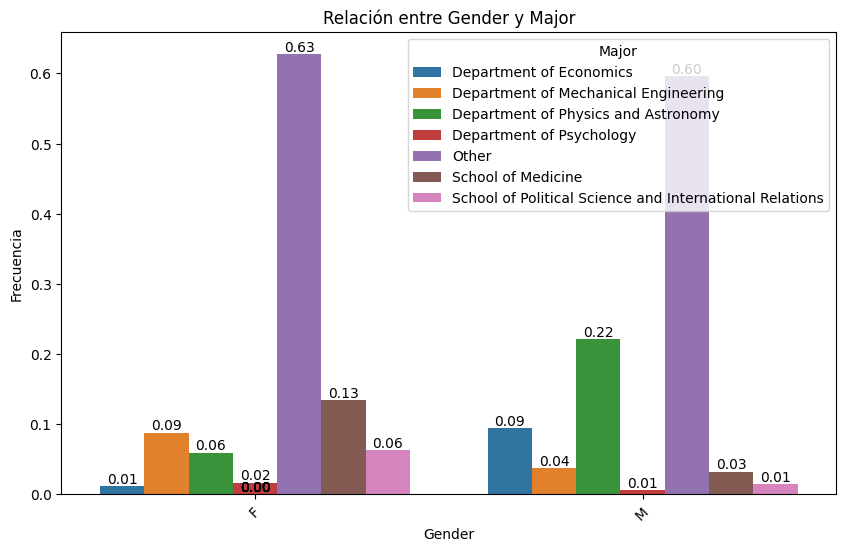

In [9]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [10]:
df_tips = pd.read_csv("./data/tips.csv")

In [11]:
df_tips = df_tips.drop(columns=["Unnamed: 0"])
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [12]:
df_car = pd.read_csv("./data/car_crashes.csv", sep = "|")

In [13]:
df_car = df_car.drop(columns=["Unnamed: 0"])
df_car = df_car.rename(columns={"abbrev" : "state"})
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   state           51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [14]:
# Tips

corr_matrix = df_tips.corr(numeric_only= True)
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


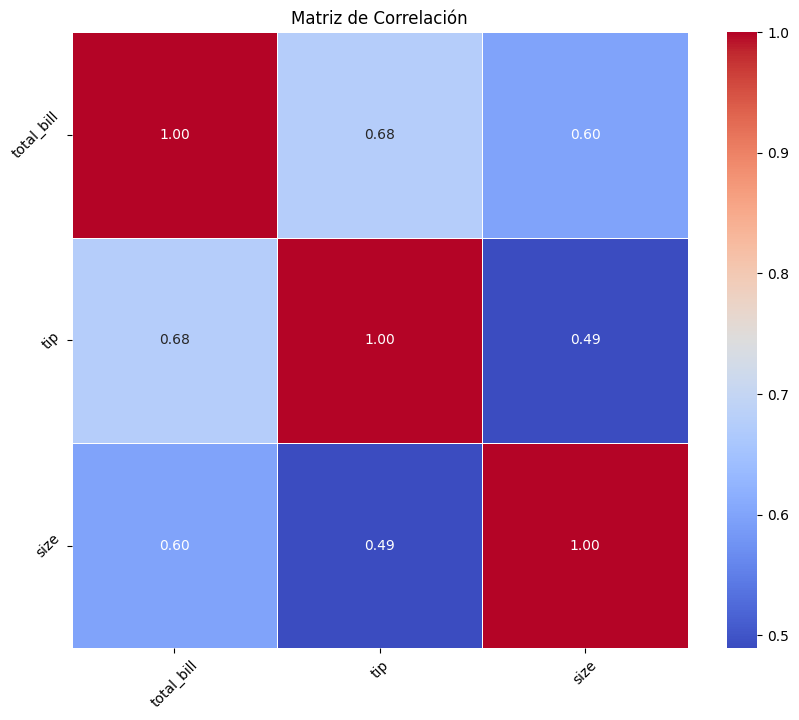

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5)

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

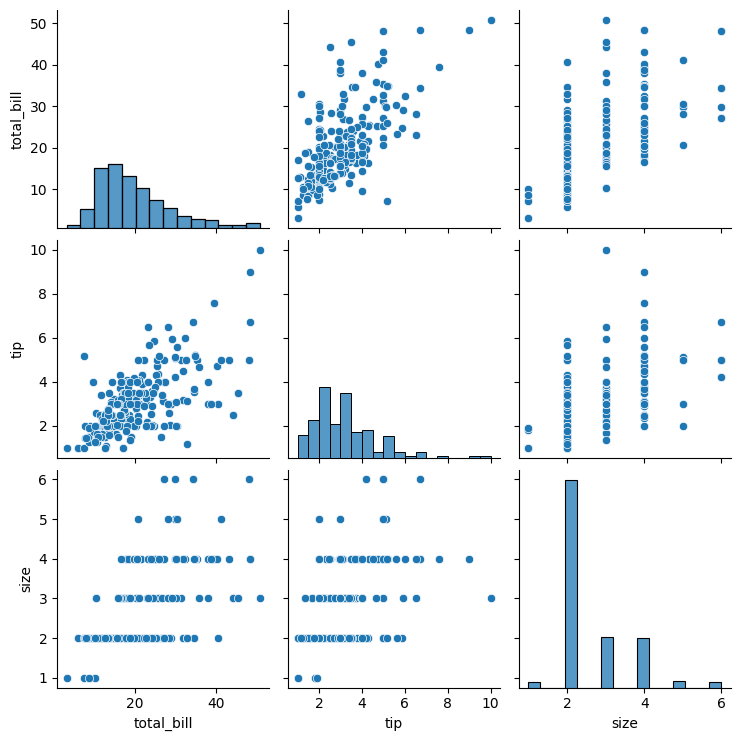

In [16]:
df_solo_numeros = df_tips.select_dtypes(include = ["float","int"])

sns.pairplot(df_solo_numeros)
plt.show()

In [17]:
# Car

corr_matrix = df_car.corr(numeric_only= True)
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


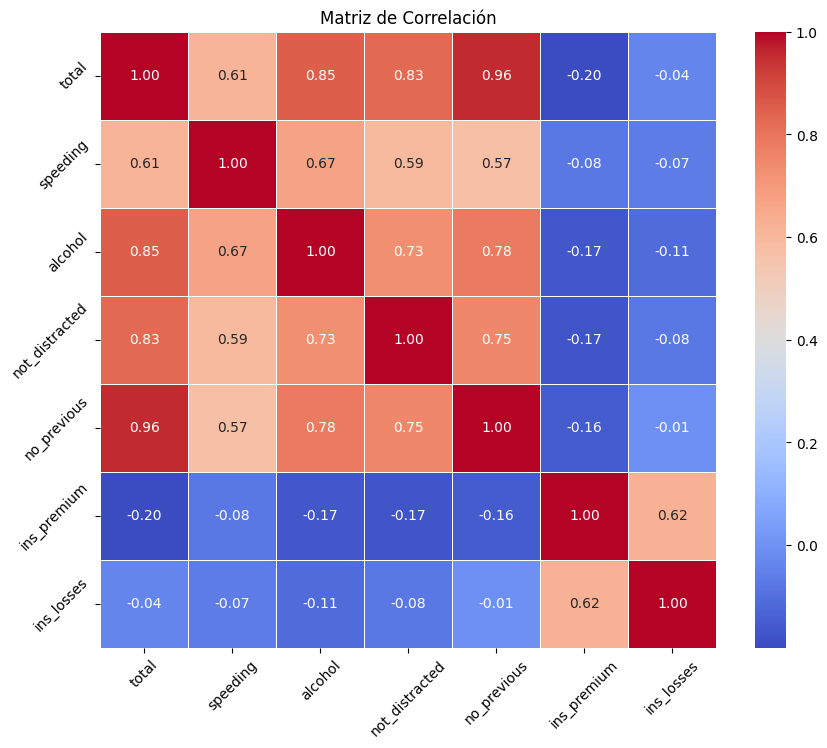

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5)

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

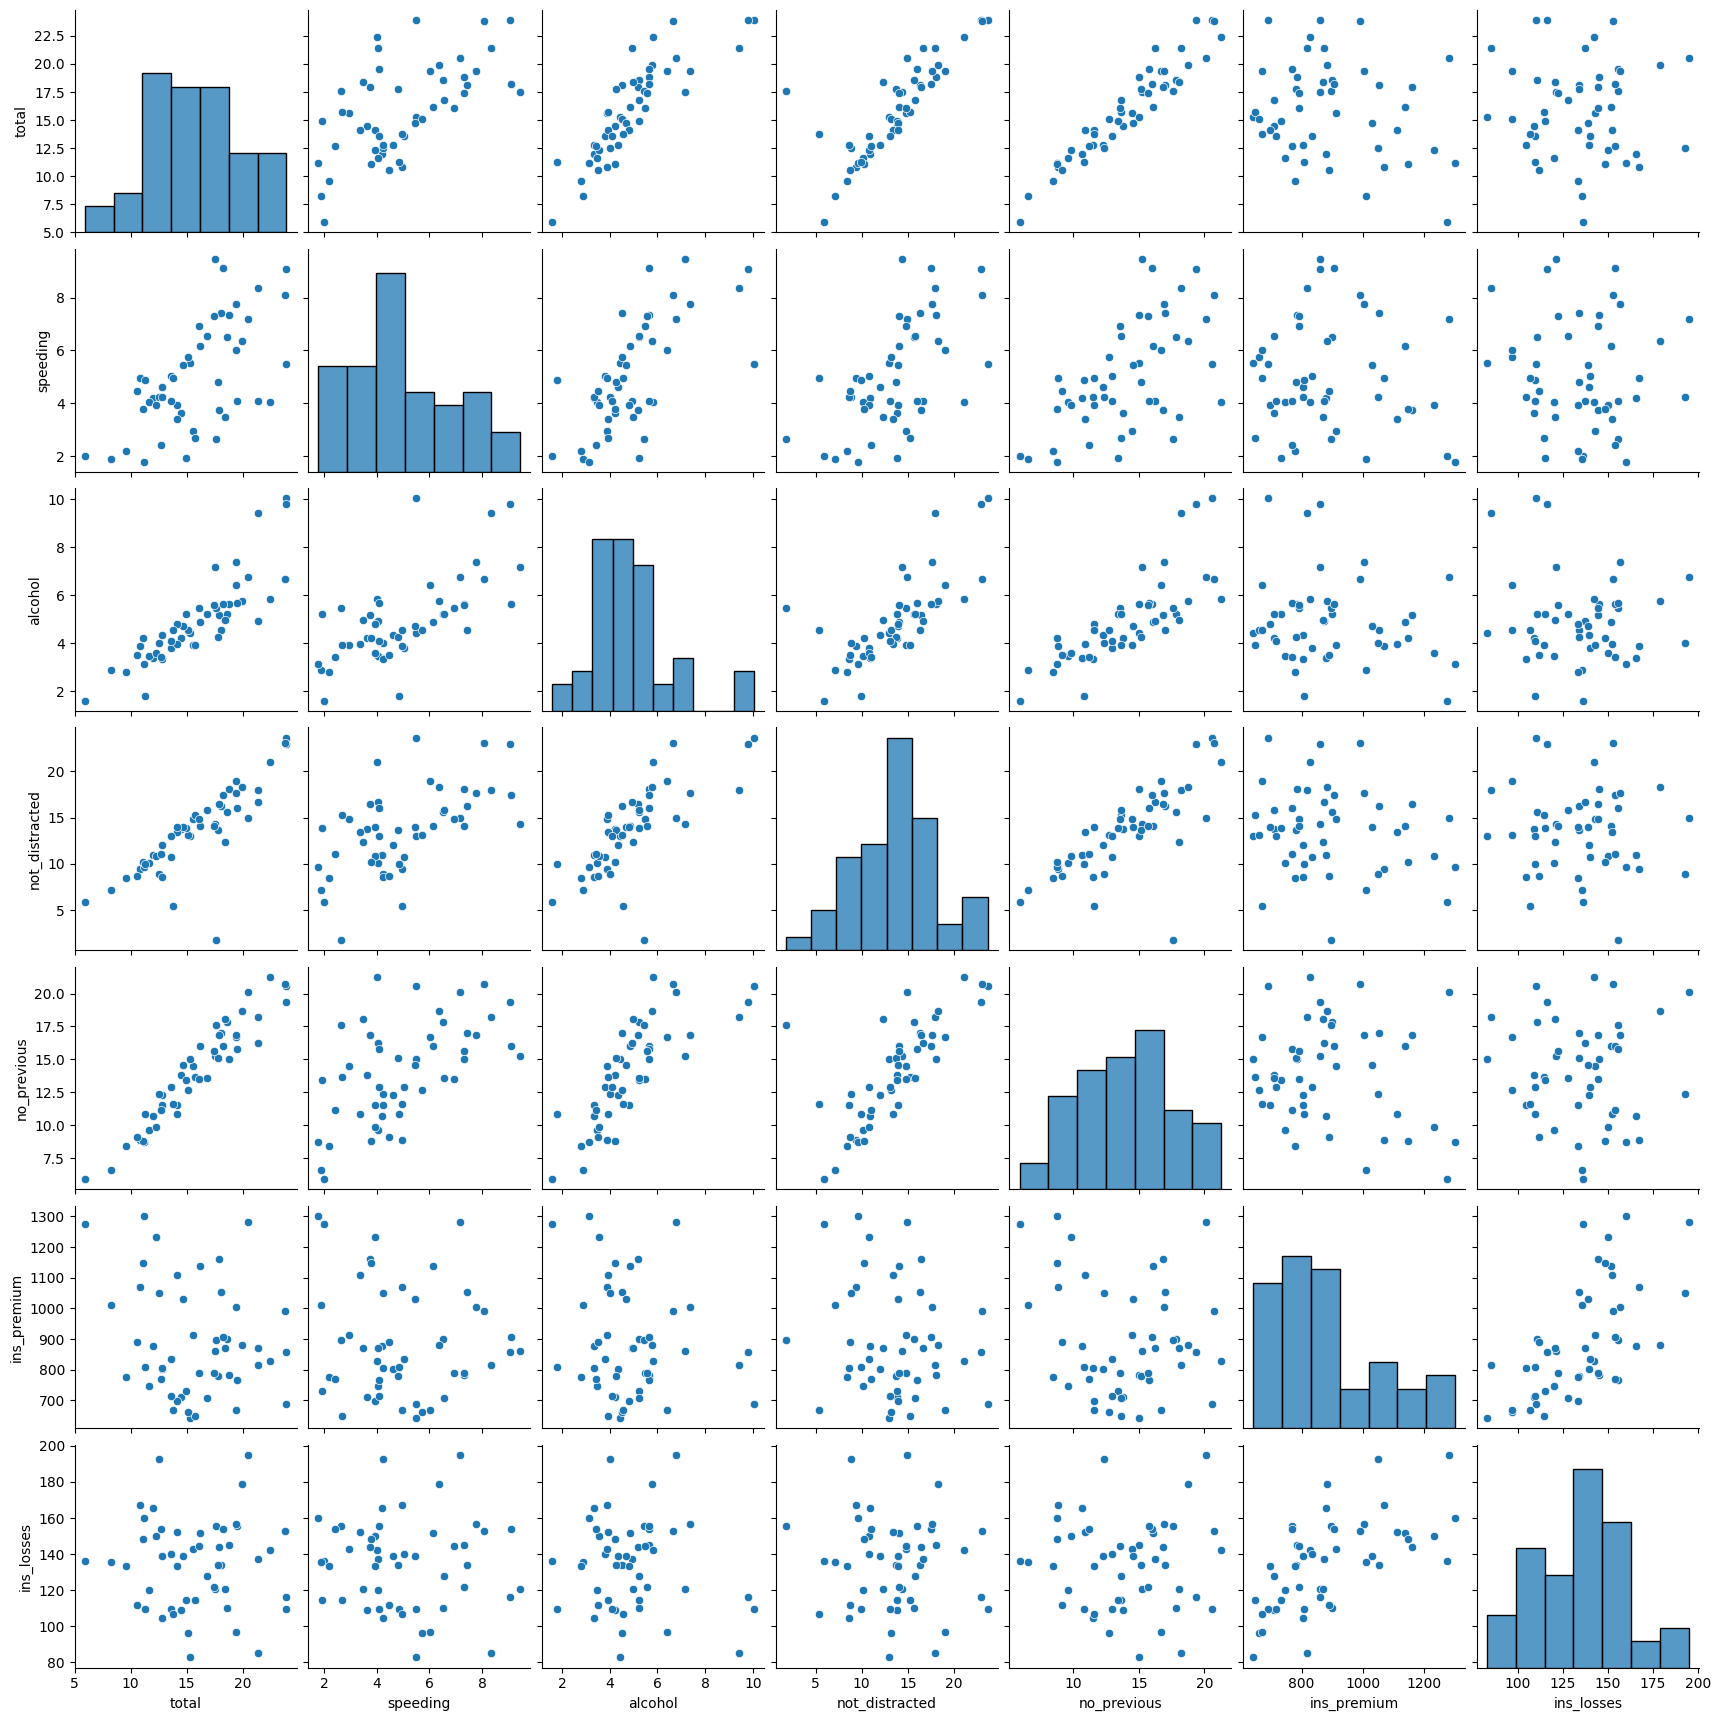

In [19]:
df_solo_numeros = df_car.select_dtypes(include = ["float","int"])

sns.pairplot(df_solo_numeros)
plt.show()

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [24]:
col_directora = "total"
col_1 = "alcohol"
col_2 = "speeding"
diccionario_multivariante = {}
for valor in df_car[col_directora].unique():
    diccionario_multivariante[valor] = df_car.loc[df_car[col_directora] == valor,[col_2,col_1]]

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)